In [2]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")

df = pd.read_csv("Pharm Data.csv")
df.dropna(inplace=True)
print(df.head())
print(df.info())
print(df.describe())

              Distributor Country   Channel  Sub-channel     Product Class  \
0  Gottlieb-Cruickshank    Poland  Hospital      Private  Mood Stabilizers   
1  Gottlieb-Cruickshank    Poland  Pharmacy       Retail       Antibiotics   
2  Gottlieb-Cruickshank    Poland  Pharmacy  Institution       Antibiotics   
3  Gottlieb-Cruickshank    Poland  Hospital      Private        Analgesics   
4  Gottlieb-Cruickshank    Poland  Pharmacy       Retail        Analgesics   

   Quantity  Price   Sales    Month  Year  
0       4.0    368  1472.0  January  2018  
1       7.0    591  4137.0  January  2018  
2      30.0     66  1980.0  January  2018  
3       6.0    435  2610.0  January  2018  
4      20.0    458  9160.0  January  2018  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Distributor    254082 non-null  object 
 1   Country        2

In [3]:
# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    
#Feature/Target Split and Train-Test Split
X = df.drop(columns=['Sales'])
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

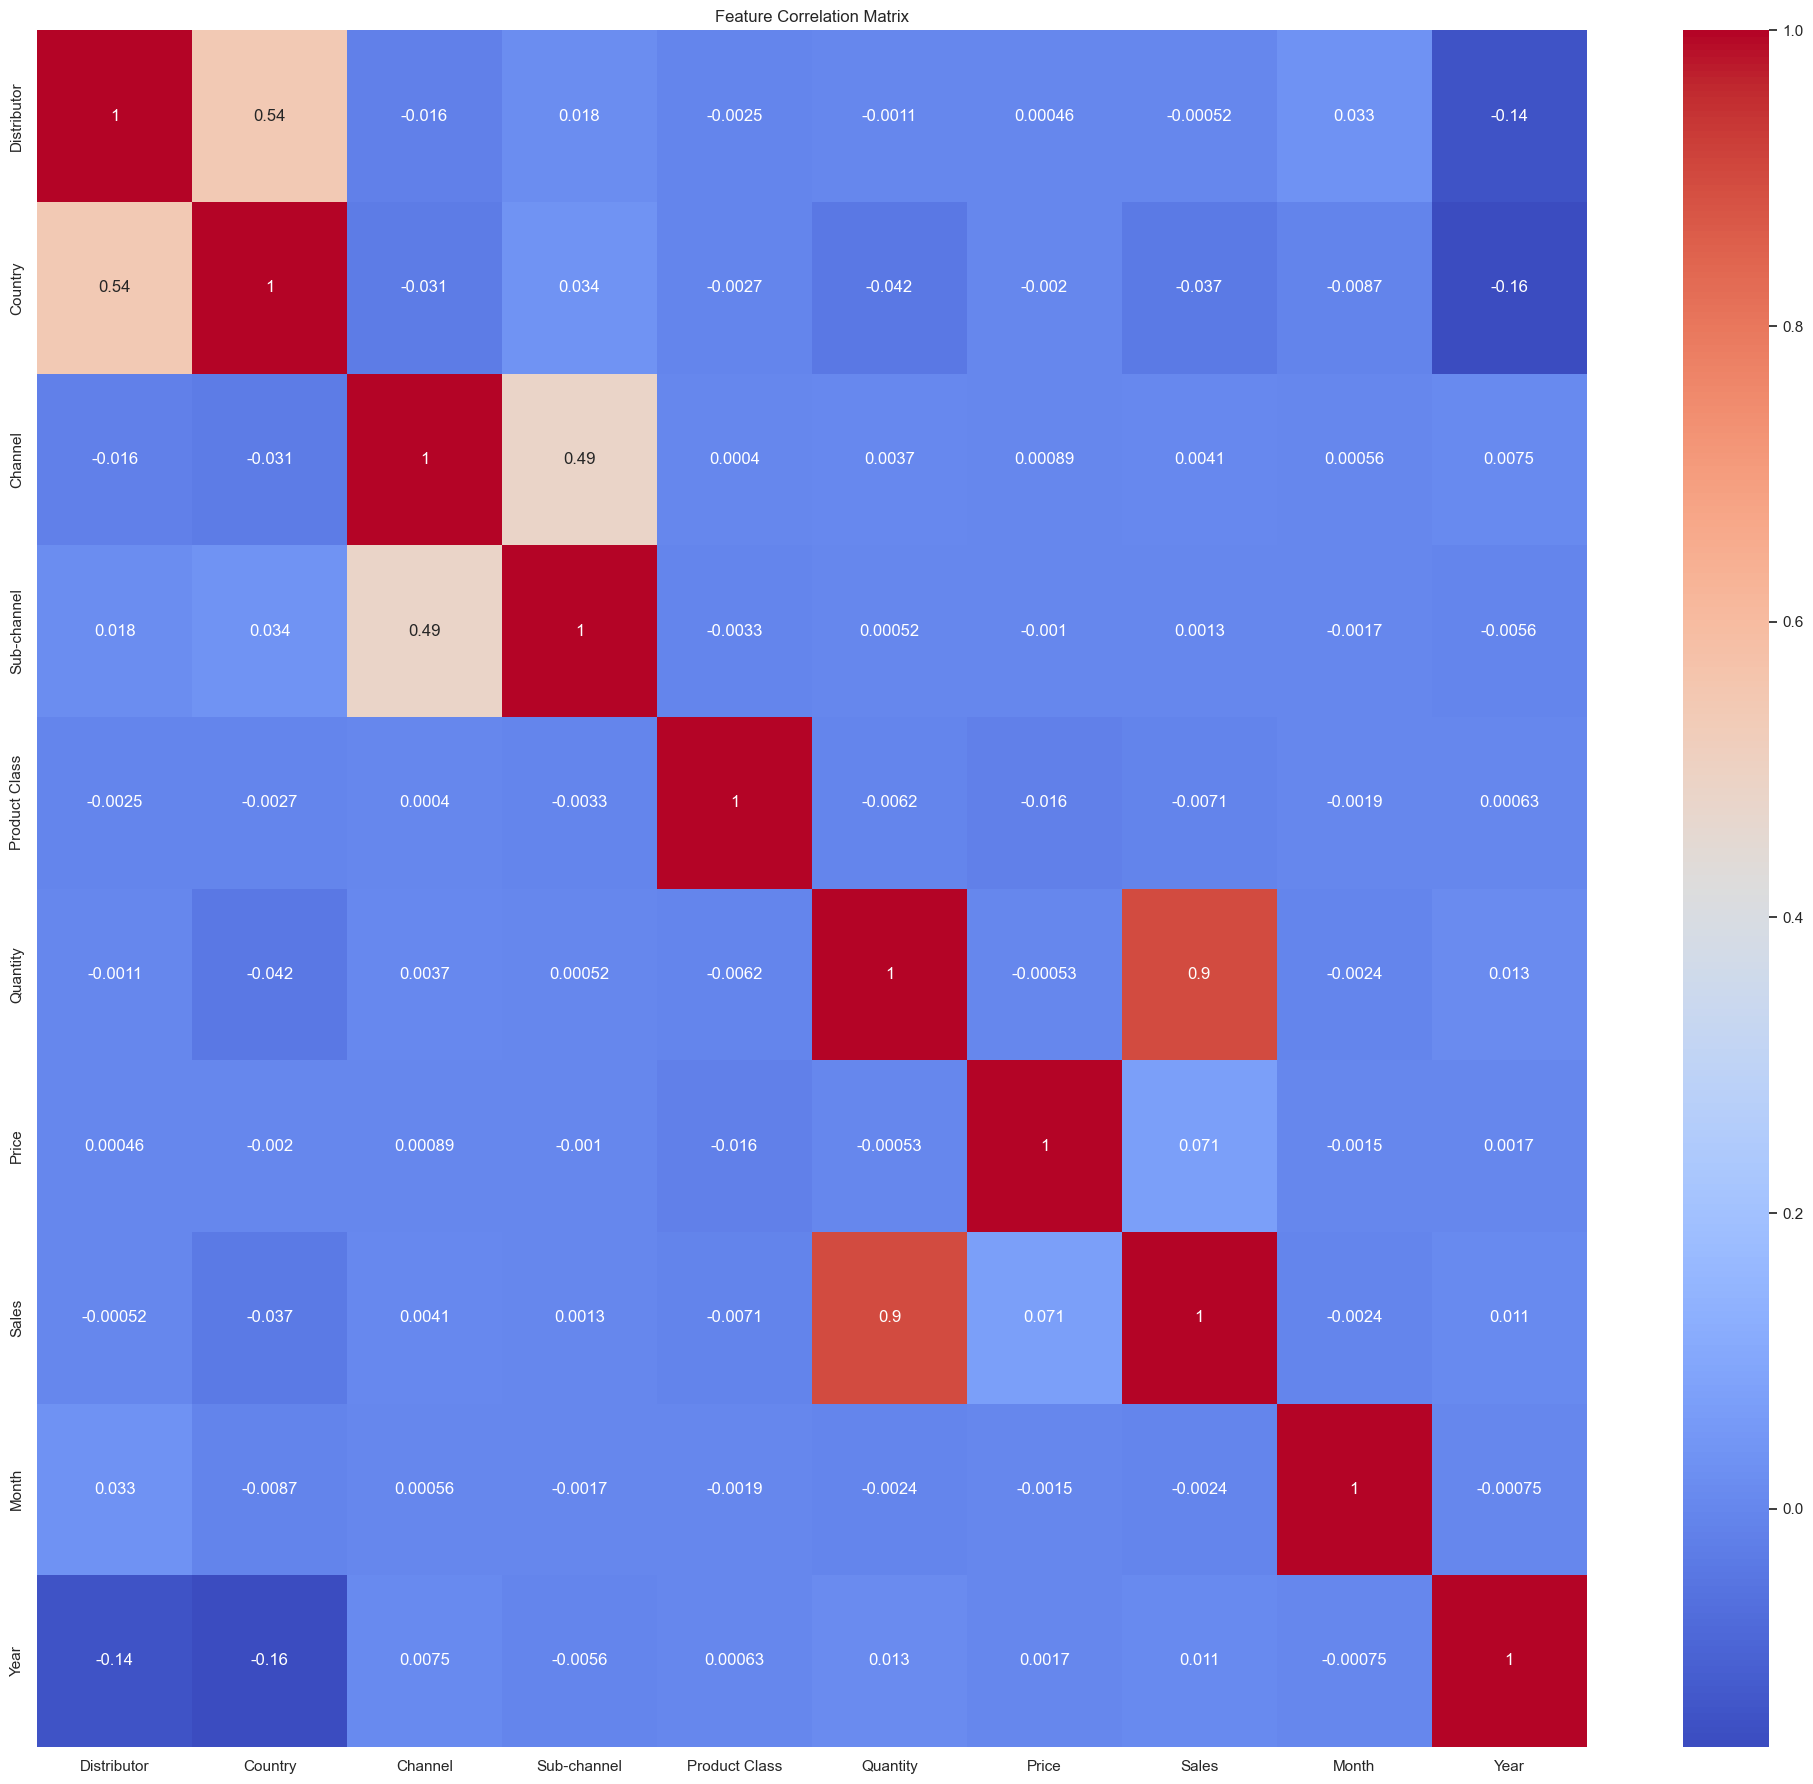

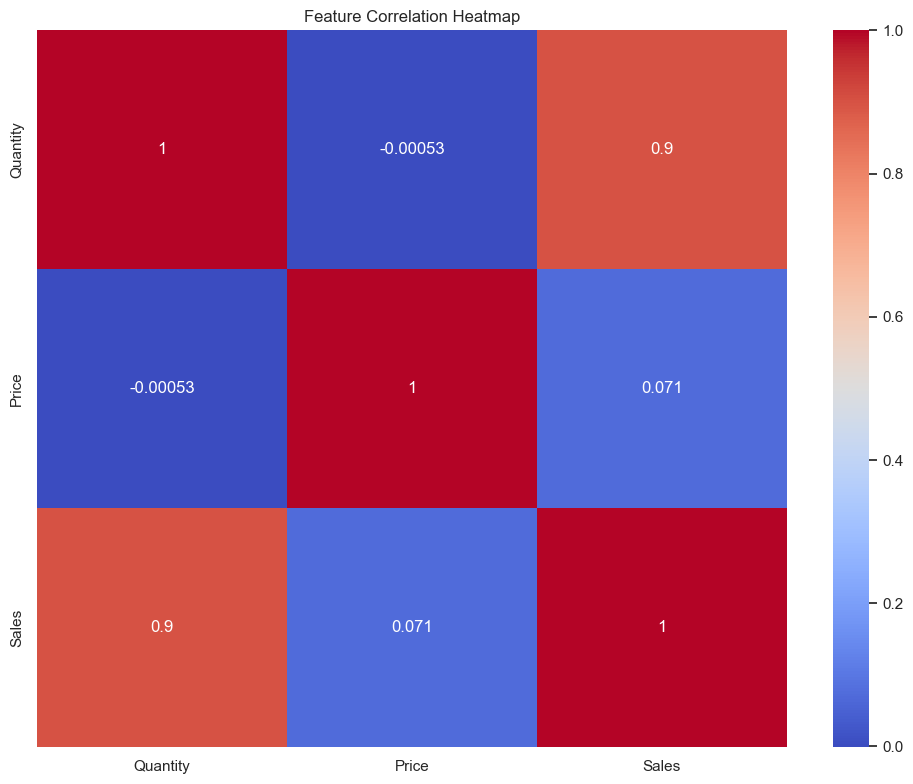

In [4]:
#EDA - Correlation Heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

#Narrow down
plt.figure(figsize=(10, 8))
corr = df[['Quantity', 'Price', 'Sales']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()

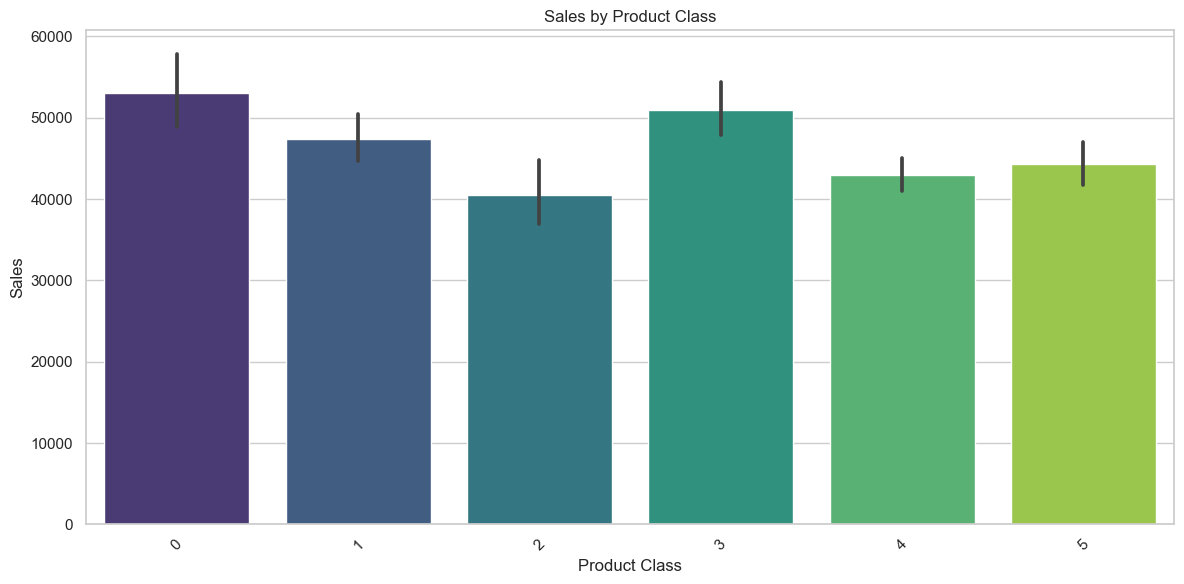

In [17]:
#EDA - Sales by Product Class
df_temp = df
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Class', y='Sales', data=df_temp, palette="viridis")
plt.xticks(rotation=45)
plt.title("Sales by Product Class")
plt.tight_layout()
plt.show()

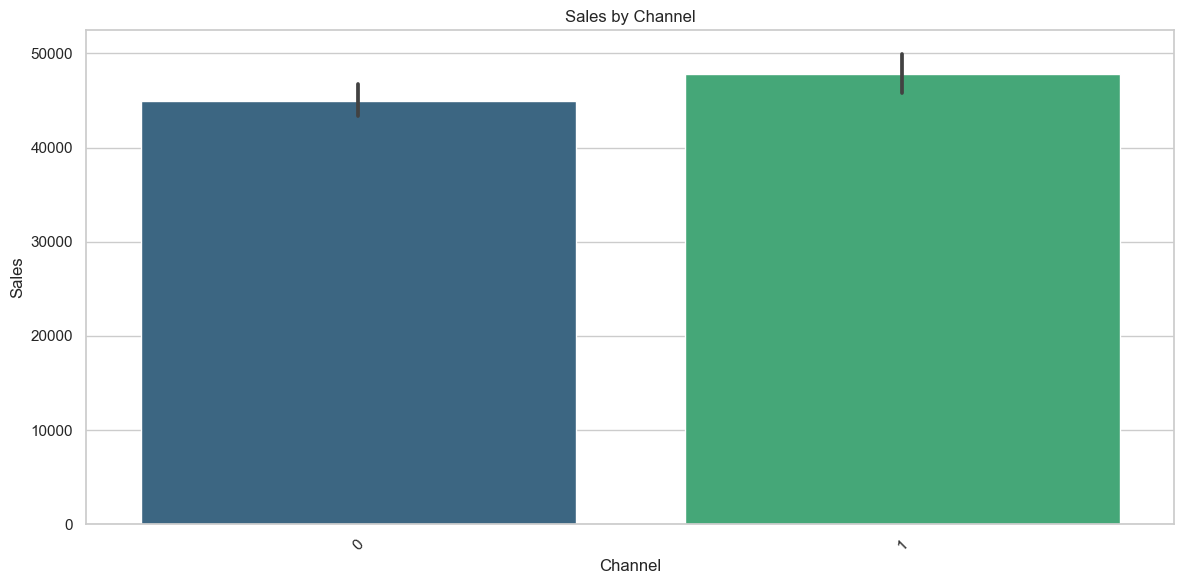

In [23]:
#EDA - Sales by Channel
df_temp = df
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Sales', data=df_temp, palette="viridis")
plt.xticks(rotation=45)
plt.title("Sales by Channel")
plt.tight_layout()
plt.show()

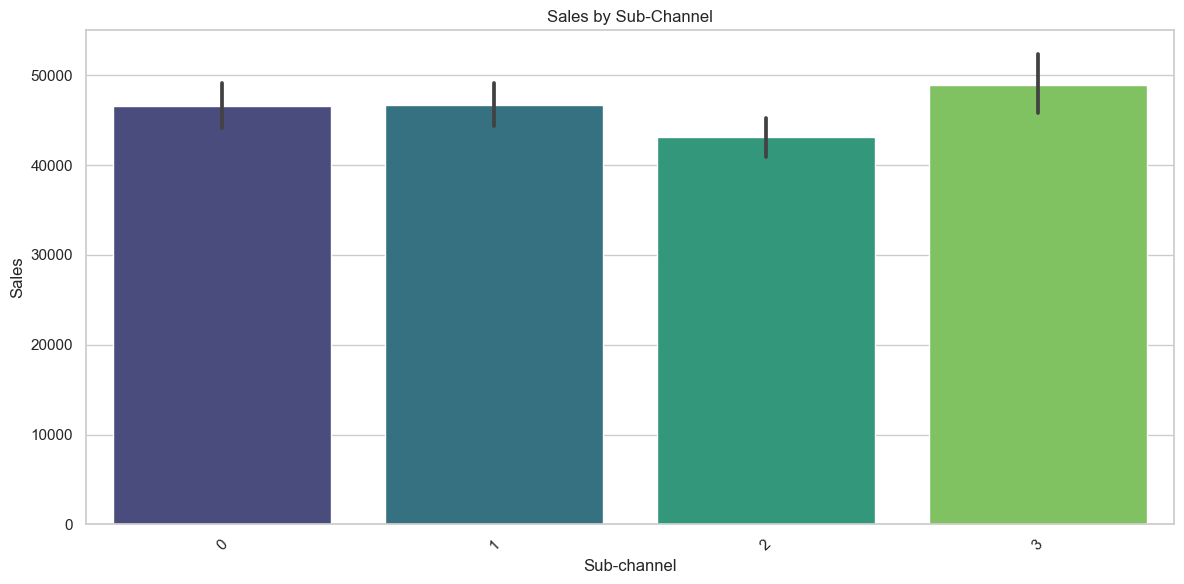

In [24]:
#EDA - Sales by Sub Channel
df_temp = df
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-channel', y='Sales', data=df_temp, palette="viridis")
plt.xticks(rotation=45)
plt.title("Sales by Sub-Channel")
plt.tight_layout()
plt.show()

In [9]:
#Random Forest Regressor
features = ['Distributor', 'Channel', 'Sub-channel', 'Product Class', 'Quantity', 'Price', 'Month', 'Year']
X = df[features]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [25]:
#Model Performance
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.9814322083840081
RMSE: 44253.84078337974


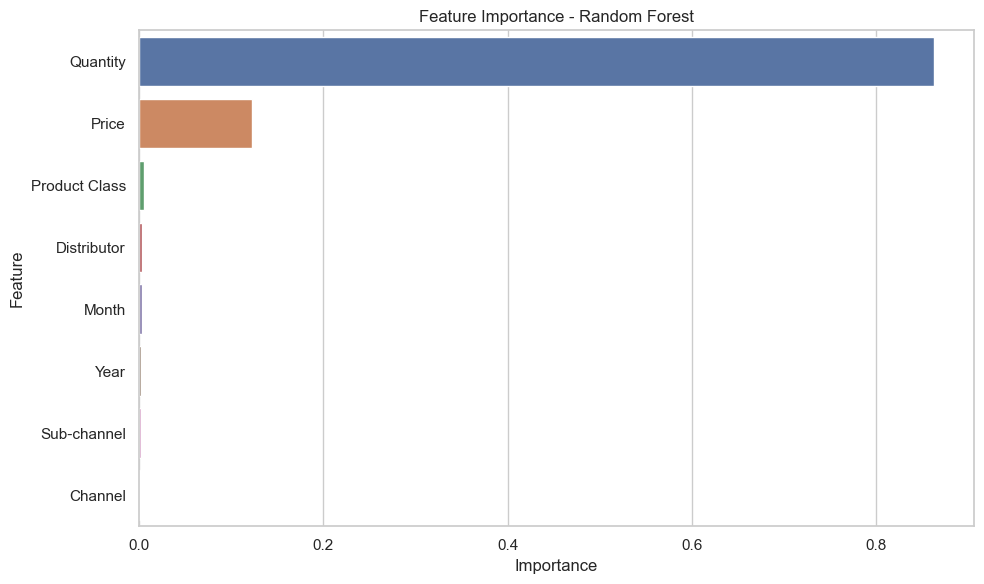

In [26]:
#Feature Importance
importances = rf.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

In [27]:
#Forecast for New Data
new_input = pd.DataFrame([X.mean()])
predicted_sales = rf.predict(new_input)
print(f"Forecasted Sales for Simulated New Input: {predicted_sales[0]:.2f} units")

Forecasted Sales for Simulated New Input: 46374.16 units


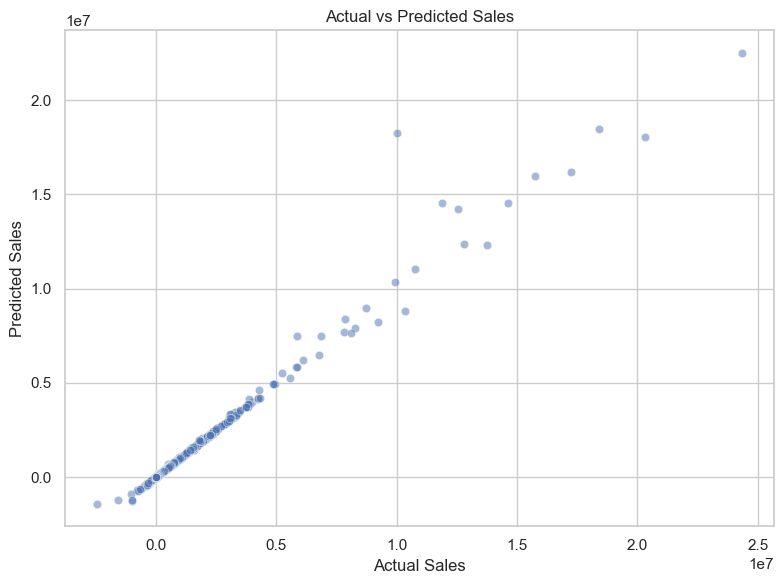

In [28]:
#Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()